<a href="https://colab.research.google.com/github/sheikita/SDS-Clustering/blob/main/TestSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Understanding**

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder


In [2]:

from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
pd.set_option('display.max_columns',50)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


List all Features and provide a definition

*   Row ID. Row number.
*   Order ID.
*   Order Date
*   Ship Date
*   Ship Mode: Class- First, Second...
*   Customer ID
*   Customer Segment
*   Country
*   City
*   State
*   Postal Code
*   Region
*   Product ID
*   Category
*   Sub-Category
*   Product Name
*   Sales - Total Price of products sold
*   Quantity - Number of items sold
*   Discount - Represents the rate applied at the order level?
*   Profit





In [5]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


In [6]:
df.shape

(9994, 21)

In [7]:
df.isna().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [10]:
#Numerical Variables Analysis
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# Dataframe composed of numerical variables
df_num = df.filter(['Sales','Quantity', 'Discount', 'Profit'], axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


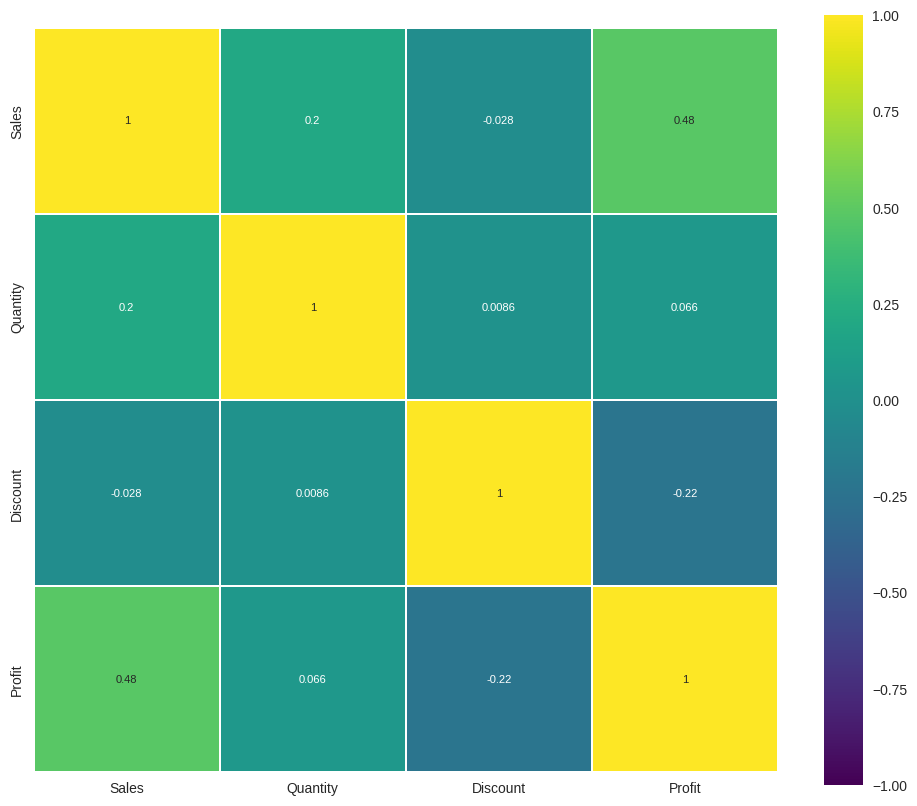

In [12]:
# prompt: graph correlation of all numerical variables
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


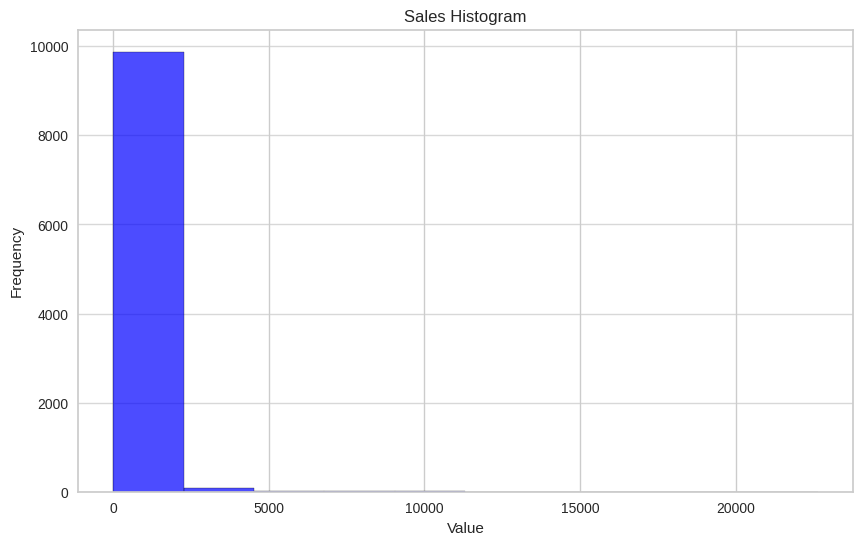

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Sales'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Sales Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

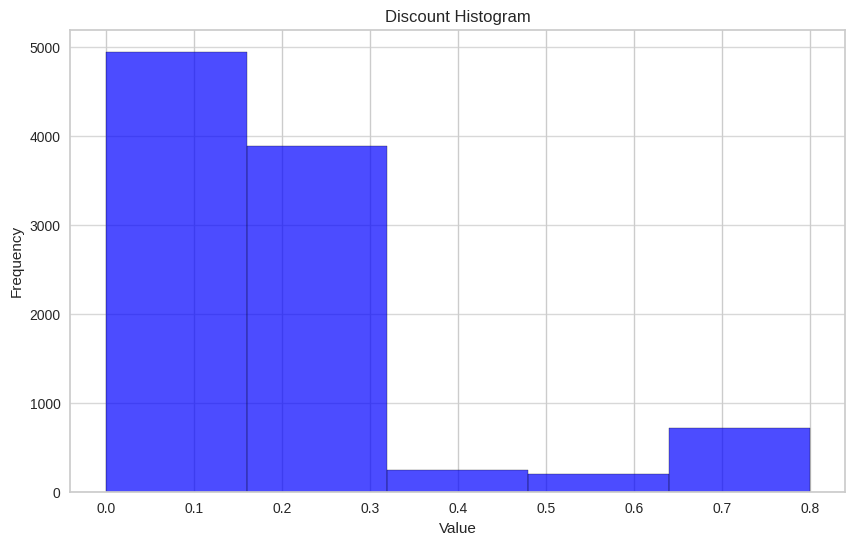

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Discount'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Discount Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

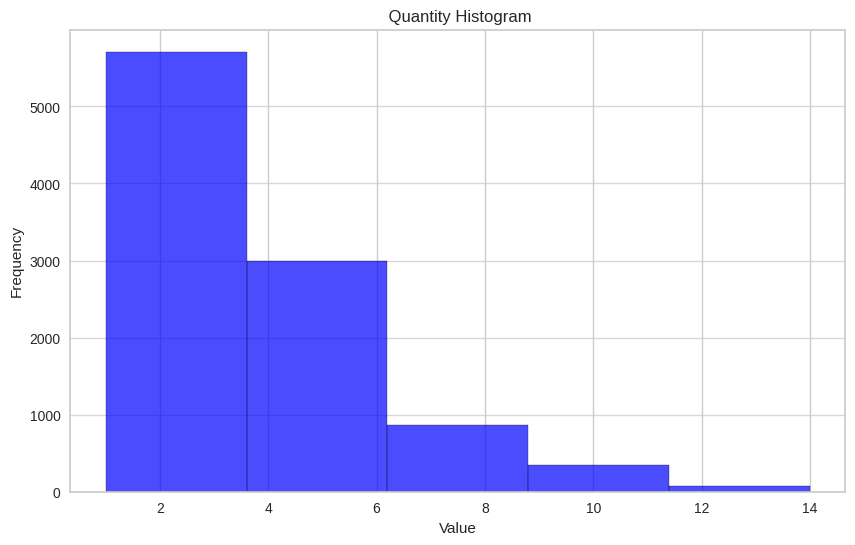

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Quantity'], bins=5, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title(' Quantity Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

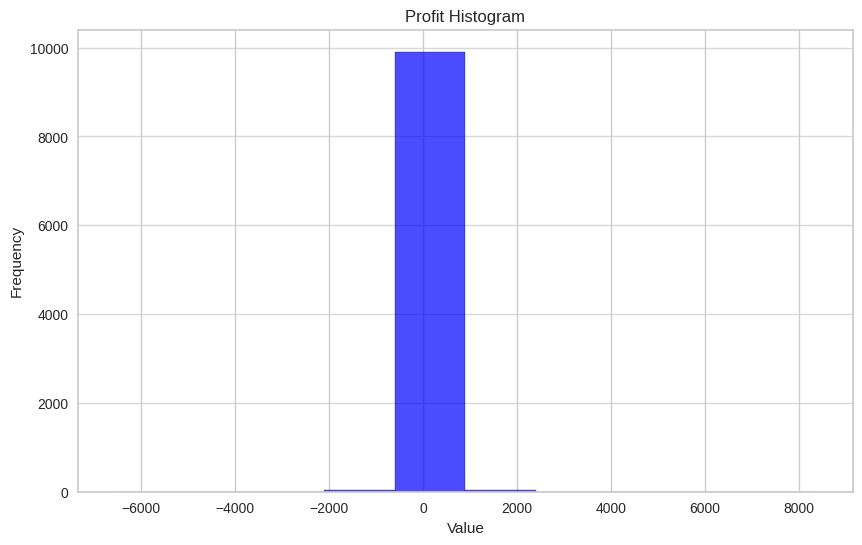

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df_num['Profit'], bins=10, edgecolor='black', color='blue', alpha=0.7)

# Customize the plot
plt.title('Profit Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

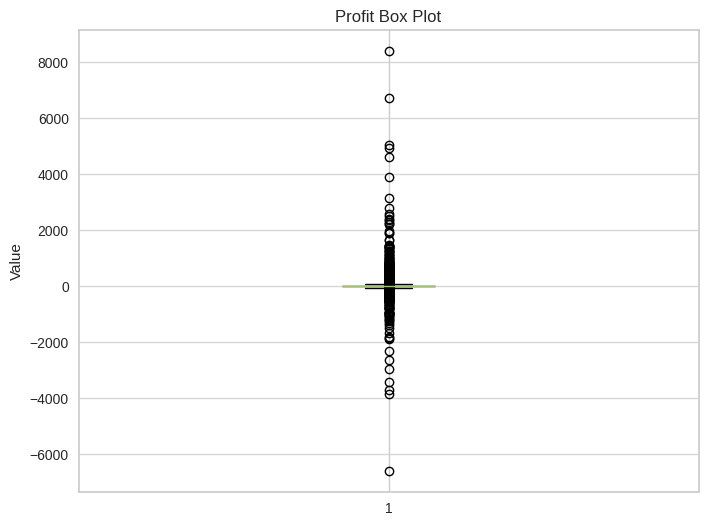

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_num['Profit'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Customize the plot
plt.title('Profit Box Plot')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

In [18]:
# Analysis of Categorical Variables
df.describe(include="object").T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [19]:
df['Country'].unique()

array(['United States'], dtype=object)

Converting into the appropriate datatypes

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

In [21]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [22]:
df['Customer ID'].nunique(), df['Customer Name'].nunique()


(793, 793)

In [23]:
df['Postal Code'].nunique(), df['City'].nunique()

(631, 531)

In [24]:
df = df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df.shape

(9994, 17)

In [28]:
#identify customer with negative profit
df[df['Profit'] < 0].shape[0]

1871

In [27]:
percentage_neg_orders = (df[df['Profit'] < 0].shape[0] / df.shape[0]) * 100
print(f"Percentage of orders with negative profit: {percentage_neg_orders:.2f}%")

Percentage of orders with negative profit: 18.72%


In [32]:
# identify customer with negative profit

negative_profit_customer = df[df['Profit'] == -6599.978000]['Customer ID'].unique()
print(f"Customer with negative profit: {negative_profit_customer}")


Customer with negative profit: ['CS-12505']


In [48]:
# Number orders by customer CS-12505

ord_negcustomer = df[df['Customer ID'] == 'CS-12505'].shape[0]
print(ord_negcustomer)

9


In [49]:
# prompt: display all 9 orders by the customer

df[df['Customer ID'] == 'CS-12505']


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1477,CA-2016-121958,2016-11-13,2016-11-17,Standard Class,CS-12505,Consumer,Thomasville,North Carolina,South,OFF-SU-10000381,Office Supplies,Supplies,Acme Forged Steel Scissors with Black Enamel H...,52.136,7,0.2,5.8653
1507,CA-2016-134208,2016-09-17,2016-09-23,Standard Class,CS-12505,Consumer,Columbus,Georgia,South,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.000,4,0.0,190.0800
2803,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Consumer,San Francisco,California,West,OFF-PA-10003893,Office Supplies,Paper,Xerox 1962,12.840,3,0.0,5.7780
2804,CA-2015-159380,2015-05-12,2015-05-16,Standard Class,CS-12505,Consumer,San Francisco,California,West,OFF-PA-10004239,Office Supplies,Paper,Xerox 1953,25.680,6,0.0,11.5560
6822,US-2017-115609,2017-11-02,2017-11-07,Standard Class,CS-12505,Consumer,Los Angeles,California,West,OFF-AP-10003040,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,168.100,5,0.0,43.7060
7771,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-AC-10000926,Technology,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952
9659,CA-2014-100860,2014-03-26,2014-03-30,Second Class,CS-12505,Consumer,Pomona,California,West,OFF-LA-10001982,Office Supplies,Labels,Smead Alpha-Z Color-Coded Name Labels First Le...,18.750,5,0.0,9.0000


In [52]:
neg_cust_orders = df[df['Customer ID'] == 'CS-12505']
order_date_counts = neg_cust_orders.groupby('Order Date')['Order ID'].count()
print(order_date_counts)

Order Date
2014-03-26    1
2015-05-12    2
2016-09-17    1
2016-11-13    1
2016-11-25    3
2017-11-02    1
Name: Order ID, dtype: int64


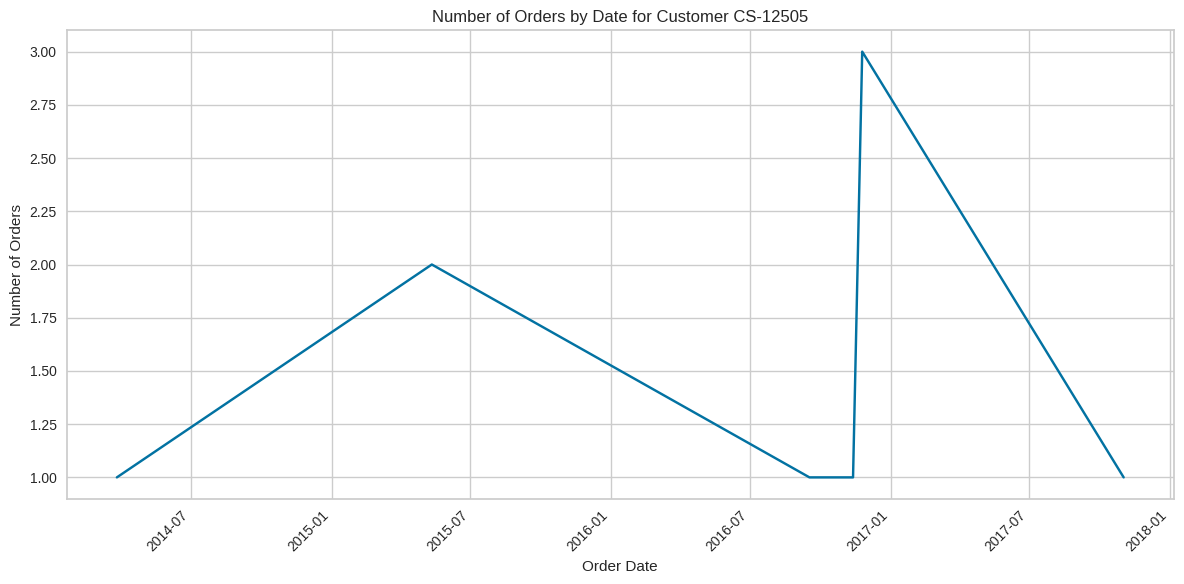

In [54]:

neg_cust_orders = df[df['Customer ID'] == 'CS-12505']
order_date_counts = neg_cust_orders.groupby('Order Date')['Order ID'].count()

plt.figure(figsize=(12, 6))
plt.plot(order_date_counts.index, order_date_counts.values)
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Date for Customer CS-12505')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
# group by customer the sales and profit

customer_sales_profit = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'})
print(customer_sales_profit)


                Sales     Profit
Customer ID                     
AA-10315     5563.560  -362.8825
AA-10375     1056.390   277.3824
AA-10480     1790.512   435.8274
AA-10645     5086.935   857.8033
AB-10015      886.156   129.3465
...               ...        ...
XP-21865     2374.658   621.2300
YC-21895     5454.350  1305.6290
YS-21880     6720.444  1778.2923
ZC-21910     8025.707 -1032.1490
ZD-21925     1493.944   249.1307

[793 rows x 2 columns]


In [55]:
orders_by_region = df.groupby('Region')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_region = df.groupby('Region')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)

orders_by_region['count'].sum(), items_by_region['items sold'].sum()

(5009, 37873)

In [56]:
print(orders_by_region)
print(items_by_region)

    Region  count
3     West   1611
1     East   1401
0  Central   1175
2    South    822
    Region  items sold
3     West       12266
1     East       10618
0  Central        8780
2    South        6209


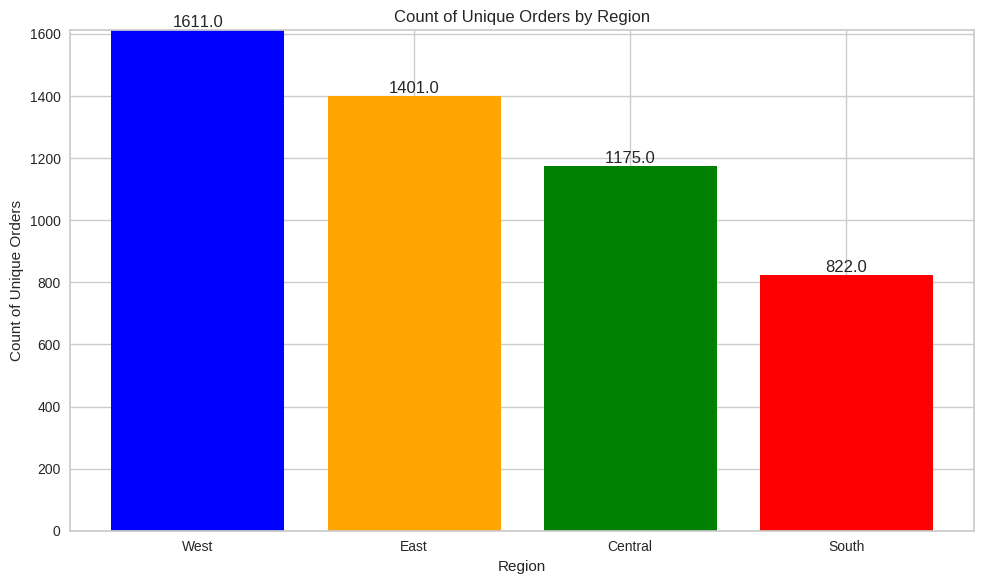

In [57]:
plt.figure(figsize=(10, 6))
bars = plt.bar(orders_by_region['Region'], orders_by_region['count'],
               color=['blue', 'orange', 'green', 'red'])

plt.title('Count of Unique Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count of Unique Orders')
plt.ylim(0, max(orders_by_region['count']) + 0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [59]:
orders_by_category = df.groupby('Category')['Order ID'].nunique().reset_index(name='count').sort_values(['count'],ascending=False)

items_by_category = df.groupby(['Category','Sub-Category'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Category','items sold'],ascending=False)
print(orders_by_category['count'].sum(), items_by_category['items sold'].sum())

display(orders_by_category)
display(items_by_category)

7050 37873


,Category,count
1,Office Supplies,3742
0,Furniture,1764
2,Technology,1544


,Category,Sub-Category,items sold
16,Technology,Phones,3289
13,Technology,Accessories,2976
15,Technology,Machines,440
14,Technology,Copiers,234
6,Office Supplies,Binders,5974
10,Office Supplies,Paper,5178
11,Office Supplies,Storage,3158
5,Office Supplies,Art,3000
4,Office Supplies,Appliances,1729
9,Office Supplies,Labels,1400


In [61]:
items_by_category.dtypes

,0
Category,object
Sub-Category,object
items sold,int64
All,object


In [60]:
items_by_category['All'] = 'All'

fig = px.treemap(items_by_category,path=['All','Category','Sub-Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig.show();

<Figure size 800x550 with 0 Axes>

In [62]:
category_by_regions = df.groupby(['Category','Region'])['Quantity'].sum().reset_index(name='items sold').sort_values(['Region','items sold'],ascending=False)

print(category_by_regions)

category_by_regions['items sold'].sum(), df['Quantity'].sum()


           Category   Region  items sold
7   Office Supplies     West        7235
3         Furniture     West        2696
11       Technology     West        2335
6   Office Supplies    South        3800
2         Furniture    South        1291
10       Technology    South        1118
5   Office Supplies     East        6462
1         Furniture     East        2214
9        Technology     East        1942
4   Office Supplies  Central        5409
0         Furniture  Central        1827
8        Technology  Central        1544


(37873, 37873)

In [63]:
category_by_regions.dtypes

,0
Category,object
Region,object
items sold,int64


In [64]:
category_by_regions['All'] = 'All'

fig = px.treemap(category_by_regions,path=['All','Region','Category'],values='items sold',width=950,height=700);
fig.update_layout(title_text='Total Items Sold by Category and Region',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout()
fig.show()

<Figure size 800x550 with 0 Axes>

In [67]:
products_by_items = df.groupby('Product Name')['Quantity'].sum().reset_index(name='items sold').sort_values(['items sold'],ascending=False)
total_items = df['Quantity'].sum()
products_by_items['percentage'] = (products_by_items['items sold'] / total_items) * 100
print(products_by_items.head(10))


                                           Product Name  items sold  \
1499                                            Staples         215   
1493                                    Staple envelope         170   
537                                   Easy-staple paper         150   
1500                            Staples in misc. colors          86   
942                          KI Adjustable-Height Table          74   
259                             Avery Non-Stick Binders          71   
1511                            Storex Dura Pro Binders          71   
699   GBC Premium Transparent Covers with Diagonal L...          67   
1450         Situations Contoured Folding Chairs, 4/Set          64   
1497                         Staple-based wall hangings          62   

      percentage  
1499    0.567687  
1493    0.448869  
537     0.396061  
1500    0.227075  
942     0.195390  
259     0.187469  
1511    0.187469  
699     0.176907  
1450    0.168986  
1497    0.163705  


In [73]:
print('average discount = {:.1f}%.'.format(df['Discount'].mean() * 100))

average discount = 15.6%.


In [77]:
df["year"]  = df["Order Date"].dt.year
discount_by_year = (df.groupby('year')['Discount'].mean() * 100).reset_index(name='avg discount').sort_values(['year'],ascending=True)
print(discount_by_year)

   year  avg discount
0  2014     15.828399
1  2015     15.560894
2  2016     15.474295
3  2017     15.646739


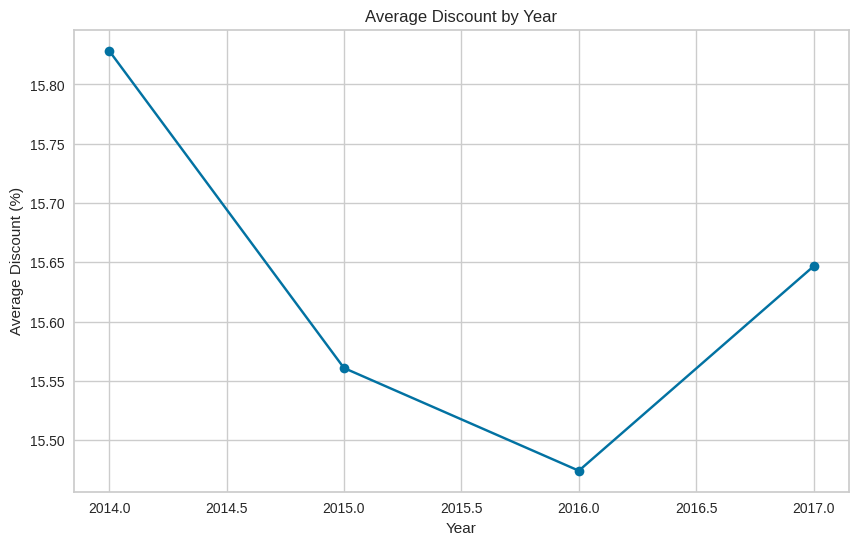

In [78]:
# prompt: generate plot for discount

plt.figure(figsize=(10, 6))
plt.plot(discount_by_year['year'], discount_by_year['avg discount'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Discount (%)')
plt.title('Average Discount by Year')
plt.grid(True)
plt.show()


In [108]:
df_region = df[['State', 'Segment', 'Profit']]
print(df_region.head(10))

        State    Segment    Profit
0    Kentucky   Consumer   41.9136
1    Kentucky   Consumer  219.5820
2  California  Corporate    6.8714
3     Florida   Consumer -383.0310
4     Florida   Consumer    2.5164
5  California   Consumer   14.1694
6  California   Consumer    1.9656
7  California   Consumer   90.7152
8  California   Consumer    5.7825
9  California   Consumer   34.4700


In [111]:
df_encodedr = pd.get_dummies(df_region, columns=['State', 'Segment'])
print(df_encodedr.head(10))



     Profit  State_Alabama  State_Arizona  State_Arkansas  State_California  \
0   41.9136          False          False           False             False   
1  219.5820          False          False           False             False   
2    6.8714          False          False           False              True   
3 -383.0310          False          False           False             False   
4    2.5164          False          False           False             False   
5   14.1694          False          False           False              True   
6    1.9656          False          False           False              True   
7   90.7152          False          False           False              True   
8    5.7825          False          False           False              True   
9   34.4700          False          False           False              True   

   State_Colorado  State_Connecticut  State_Delaware  \
0           False              False           False   
1           False 

In [112]:
features = df_encodedr[['Profit'] + list(df_encodedr.columns[df_encodedr.columns.str.startswith('State')]) + list(df_encodedr.columns[df_encodedr.columns.str.startswith('Segment_')])]

In [113]:
print(features.head(10))

     Profit  State_Alabama  State_Arizona  State_Arkansas  State_California  \
0   41.9136          False          False           False             False   
1  219.5820          False          False           False             False   
2    6.8714          False          False           False              True   
3 -383.0310          False          False           False             False   
4    2.5164          False          False           False             False   
5   14.1694          False          False           False              True   
6    1.9656          False          False           False              True   
7   90.7152          False          False           False              True   
8    5.7825          False          False           False              True   
9   34.4700          False          False           False              True   

   State_Colorado  State_Connecticut  State_Delaware  \
0           False              False           False   
1           False 

In [114]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

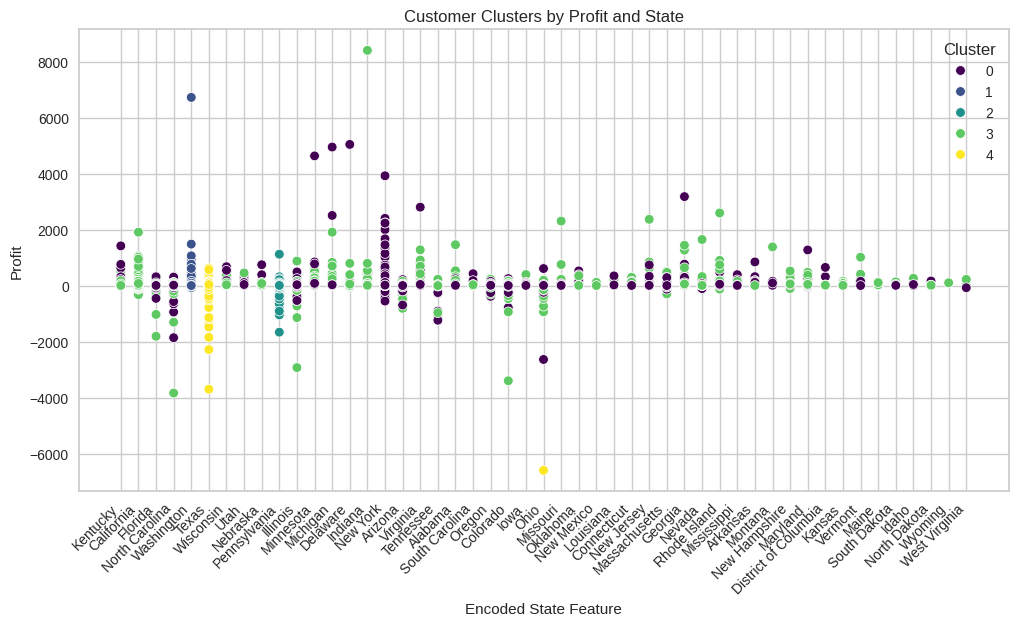

In [118]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_region['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters by Sales and one of the encoded features (for illustration)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_region, x='State', y='Profit', hue='Cluster', palette='viridis')
plt.title('Customer Clusters by Profit and State')
plt.xlabel('Encoded State Feature')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.show()

In [126]:
customerdata = df_region.copy()
customerdata.drop(['Cluster','Segment'],axis=1,inplace=True)
print(customerdata.head())

        State    Profit
0    Kentucky   41.9136
1    Kentucky  219.5820
2  California    6.8714
3     Florida -383.0310
4     Florida    2.5164


In [127]:
le = LabelEncoder()
customerdata['encoded_column'] = le.fit_transform(customerdata['State'])

In [128]:
customerdata.head(10)

,State,Profit,encoded_column
0,Kentucky,41.9136,15
1,Kentucky,219.5820,15
2,California,6.8714,3
3,Florida,-383.0310,8
4,Florida,2.5164,8
5,California,14.1694,3
6,California,1.9656,3
7,California,90.7152,3
8,California,5.7825,3
9,California,34.4700,3


              Profit
cluster             
0          14.825926
1        3448.794439
2          30.832479


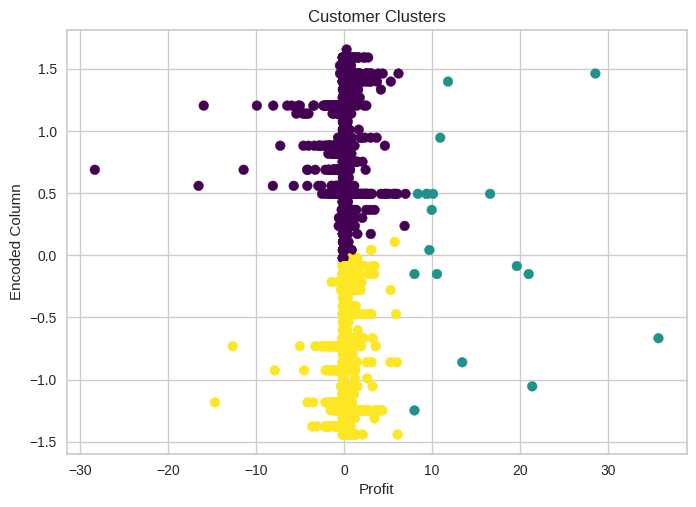

In [138]:
# prompt: Using dataframe customerdata: suggest clustering

import matplotlib.pyplot as plt
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Prepare the data for clustering
# Select relevant columns for clustering (e.g., Profit and encoded_column)
X = customerdata[['Profit', 'encoded_column']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using methods like Elbow method or Silhouette analysis
# For simplicity, we'll assume 3 clusters for now
n_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Assign cluster labels to the data
customerdata['cluster'] = kmeans.labels_

# Analyze the clusters
# For example, you can group by cluster and compute the mean profit within each cluster
cluster_analysis = customerdata.groupby('cluster').agg({'Profit': 'mean'})
print(cluster_analysis)

# Visualize the clusters
# (You may need to use a plotting library like matplotlib or seaborn for this)
# For example, you can create a scatter plot of the data with points colored by their cluster labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Profit')
plt.ylabel('Encoded Column')
plt.title('Customer Clusters')
plt.show()



# Explore the characteristics of each cluster
# For example, you can compare the mean profit, state distribution, or other variables across clusters
# This analysis can help you understand the different customer segments you have identified


In [141]:
cdata = df_region.copy()
cdata.drop(['Cluster','Segment'],axis=1,inplace=True)
print(cdata.head())


        State    Profit
0    Kentucky   41.9136
1    Kentucky  219.5820
2  California    6.8714
3     Florida -383.0310
4     Florida    2.5164


In [ ]:
#ohe = OneHotEncoder(sparse=False)
#encoded_data = ohe.fit_transform(df

In [145]:
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(cdata[['State']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['State']))
print(encoded_df.head())

   State_Alabama  State_Arizona  State_Arkansas  State_California  \
0            0.0            0.0             0.0               0.0   
1            0.0            0.0             0.0               0.0   
2            0.0            0.0             0.0               1.0   
3            0.0            0.0             0.0               0.0   
4            0.0            0.0             0.0               0.0   

   State_Colorado  State_Connecticut  State_Delaware  \
0             0.0                0.0             0.0   
1             0.0                0.0             0.0   
2             0.0                0.0             0.0   
3             0.0                0.0             0.0   
4             0.0                0.0             0.0   

   State_District of Columbia  State_Florida  State_Georgia  State_Idaho  \
0                         0.0            0.0            0.0          0.0   
1                         0.0            0.0            0.0          0.0   
2                   

In [150]:
encoded_df['Profit'] = cdata['Profit']
print(encoded_df.head())

   State_Alabama  State_Arizona  State_Arkansas  State_California  \
0            0.0            0.0             0.0               0.0   
1            0.0            0.0             0.0               0.0   
2            0.0            0.0             0.0               1.0   
3            0.0            0.0             0.0               0.0   
4            0.0            0.0             0.0               0.0   

   State_Colorado  State_Connecticut  State_Delaware  \
0             0.0                0.0             0.0   
1             0.0                0.0             0.0   
2             0.0                0.0             0.0   
3             0.0                0.0             0.0   
4             0.0                0.0             0.0   

   State_District of Columbia  State_Florida  State_Georgia  State_Idaho  \
0                         0.0            0.0            0.0          0.0   
1                         0.0            0.0            0.0          0.0   
2                   

In [152]:
pd.set_option('display.max_columns',50)

encoded_df.head()

,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,...,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Cluster,Profit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41.9136
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,219.5820
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.8714
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-383.0310
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.5164


In [153]:
encoded_df = encoded_df.drop('Cluster', axis=1)
pd.set_option('display.max_columns',50)

encoded_df.head()

,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Profit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.9136
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.5820
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.8714
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-383.0310
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5164


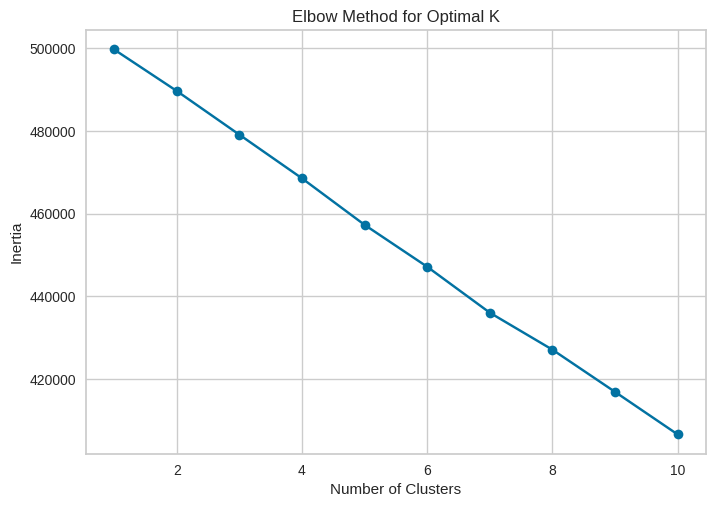

In [154]:
# prompt: suggest clustering with encoded_df

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the encoded data
scaler = StandardScaler()
scaled_encoded_data = scaler.fit_transform(encoded_df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_encoded_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



In [156]:


# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_encoded_data)

# Add cluster labels to the dataframe
encoded_df['Cluster'] = kmeans.labels_

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(scaled_encoded_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: 0.016070778387454493


In [157]:
# Analyze the clusters
# For example, you can group by cluster and see the distribution of states within each cluster
cluster_analysis = encoded_df.groupby('Cluster').mean()
print(cluster_analysis)

         State_Alabama  State_Arizona  State_Arkansas  State_California  \
Cluster                                                                   
0                  0.0       0.025006        0.006698          0.223376   
1                  1.0       0.000000        0.000000          0.000000   
2                  0.0       0.000000        0.000000          0.000000   
3                  0.0       0.000000        0.000000          0.000000   

         State_Colorado  State_Connecticut  State_Delaware  \
Cluster                                                      
0              0.020317           0.009154        0.010717   
1              0.000000           0.000000        0.000000   
2              0.000000           0.000000        0.000000   
3              0.000000           0.000000        0.000000   

         State_District of Columbia  State_Florida  State_Georgia  \
Cluster                                                             
0                          0.001116   

In [159]:
# prompt: what to find out the columns encoded_df has

print(encoded_df.columns)


Index(['State_Alabama', 'State_Arizona', 'State_Arkansas', 'State_California',
       'State_Colorado', 'State_Connecticut', 'State_Delaware',
       'State_District of Columbia', 'State_Florida', 'State_Georgia',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine',
       'State_Maryland', 'State_Massachusetts', 'State_Michigan',
       'State_Minnesota', 'State_Mississippi', 'State_Missouri',
       'State_Montana', 'State_Nebraska', 'State_Nevada',
       'State_New Hampshire', 'State_New Jersey', 'State_New Mexico',
       'State_New York', 'State_North Carolina', 'State_North Dakota',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisc

In [ ]:

# Assuming you have a DataFrame 'encoded_df' with 'Cluster' labels and features

# Visualize the clusters using a scatter plot matrix
# Select the features you want to visualize (e.g., the encoded state features and profit)
features_to_visualize = ['Profit'] + list(encoded_df.columns[encoded_df.columns.str.startswith('State_')])

# Create a scatter plot matrix using seaborn
sns.pairplot(encoded_df, hue='Cluster', vars=features_to_visualize)
plt.show()

KeyboardInterrupt: 

In [149]:
# prompt: how can I find out the Principal component 1 selected and the label

print(principal_df[['PC1', 'Cluster']])


           PC1  Cluster
0    -0.397212        0
1    -0.397212        0
2     2.176268        0
3    -0.455974        0
4    -0.455974        0
...        ...      ...
9989 -0.455974        0
9990  2.176268        0
9991  2.176268        0
9992  2.176268        0
9993  2.176268        0

[9994 rows x 2 columns]
